In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, sys
from tqdm import tqdm
from datetime import datetime

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

from sklearn.decomposition import PCA


from autoencoder import Autoencoder
from solver import train_vali_all_epochs, dev_train_vali_all_epochs, test

In [2]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

batch_size = 128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=6)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=6)

In [3]:
run_id = datetime.today().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.getenv("HOME") + '/sparsify_models/AE/MNIST/' +run_id +'/'
print(save_path)

/home/david/sparsify_models/AE/MNIST/2025-01-31_15-25-08/


In [4]:
model = Autoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.99)
device = torch.device('cuda')

In [5]:
epochs = 50
explained_variance_ratios = []
latent_matrices = []

for i in range(epochs):
    model.train()
    train_vali_all_epochs(model, train_loader, test_loader, optimizer, n_epochs=1, device=device, save_path=save_path+'Static/')

    latent_list = []
    model.eval()

    # Loop through validation data
    with torch.no_grad():  # Gradients not calculated
        for batch_idx, (data, target) in enumerate(test_loader):
            # Convert to a PyTorch variable
            data = Variable(data).to('cuda')

            # Flatten the input data into a 2D tensor [batch_size, num_features]
            batch_size = data.size(0)
            input = data.view(batch_size, -1).to('cuda')

            encoded = model(input)[0]

            latent_list.append(encoded.cpu().numpy())

    latent_matrix = np.concatenate(latent_list)

    pca = PCA(n_components=32)
    pca.fit(latent_matrix)

    explained_variance_ratios.append(pca.explained_variance_ratio_)
    latent_matrices.append(pca.components_)

Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000610: 100%|██████████| 469/469 [00:02<00:00, 156.40it/s]


====> Epoch: 0 Average loss: 0.0677


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0607
Directory created: /home/david/sparsify_models/AE/MNIST/2025-01-31_15-25-08/Static/
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000469: 100%|██████████| 469/469 [00:02<00:00, 157.08it/s]

====> Epoch: 0 Average loss: 0.0563



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0481
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000367: 100%|██████████| 469/469 [00:02<00:00, 173.82it/s]

====> Epoch: 0 Average loss: 0.0426



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0364
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000289: 100%|██████████| 469/469 [00:03<00:00, 155.69it/s]

====> Epoch: 0 Average loss: 0.0320



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0282
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000241: 100%|██████████| 469/469 [00:02<00:00, 163.11it/s]

====> Epoch: 0 Average loss: 0.0258



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0234
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000214: 100%|██████████| 469/469 [00:02<00:00, 166.41it/s]

====> Epoch: 0 Average loss: 0.0222



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0206
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000200: 100%|██████████| 469/469 [00:02<00:00, 167.06it/s]


====> Epoch: 0 Average loss: 0.0200


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0186
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000172: 100%|██████████| 469/469 [00:02<00:00, 165.67it/s]


====> Epoch: 0 Average loss: 0.0181


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0172
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000168: 100%|██████████| 469/469 [00:02<00:00, 162.39it/s]

====> Epoch: 0 Average loss: 0.0170



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0165
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000171: 100%|██████████| 469/469 [00:02<00:00, 162.97it/s]

====> Epoch: 0 Average loss: 0.0160



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0152
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000156: 100%|██████████| 469/469 [00:02<00:00, 158.12it/s]

====> Epoch: 0 Average loss: 0.0151



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0145
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000159: 100%|██████████| 469/469 [00:02<00:00, 160.45it/s]


====> Epoch: 0 Average loss: 0.0144


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0139
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000146: 100%|██████████| 469/469 [00:02<00:00, 159.32it/s]


====> Epoch: 0 Average loss: 0.0140


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0138
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000137: 100%|██████████| 469/469 [00:02<00:00, 163.58it/s]

====> Epoch: 0 Average loss: 0.0136



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0132
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000142: 100%|██████████| 469/469 [00:02<00:00, 164.83it/s]

====> Epoch: 0 Average loss: 0.0134



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0132
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000126: 100%|██████████| 469/469 [00:02<00:00, 163.66it/s]

====> Epoch: 0 Average loss: 0.0132



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0130
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000134: 100%|██████████| 469/469 [00:02<00:00, 160.71it/s]

====> Epoch: 0 Average loss: 0.0128



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0129
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000138: 100%|██████████| 469/469 [00:02<00:00, 158.97it/s]

====> Epoch: 0 Average loss: 0.0126



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0125
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000136: 100%|██████████| 469/469 [00:02<00:00, 163.39it/s]

====> Epoch: 0 Average loss: 0.0125



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0124
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000134: 100%|██████████| 469/469 [00:02<00:00, 159.29it/s]

====> Epoch: 0 Average loss: 0.0123



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0123
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000128: 100%|██████████| 469/469 [00:02<00:00, 162.25it/s]


====> Epoch: 0 Average loss: 0.0122


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0121
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000126: 100%|██████████| 469/469 [00:02<00:00, 166.75it/s]

====> Epoch: 0 Average loss: 0.0120



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0119
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000127: 100%|██████████| 469/469 [00:02<00:00, 164.35it/s]


====> Epoch: 0 Average loss: 0.0118


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0120
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000125: 100%|██████████| 469/469 [00:02<00:00, 163.70it/s]


====> Epoch: 0 Average loss: 0.0118


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0119
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000119: 100%|██████████| 469/469 [00:02<00:00, 163.13it/s]


====> Epoch: 0 Average loss: 0.0118


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0118
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000124: 100%|██████████| 469/469 [00:02<00:00, 161.50it/s]

====> Epoch: 0 Average loss: 0.0116



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0114
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000118: 100%|██████████| 469/469 [00:02<00:00, 158.68it/s]


====> Epoch: 0 Average loss: 0.0114


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0115
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000120: 100%|██████████| 469/469 [00:02<00:00, 159.54it/s]


====> Epoch: 0 Average loss: 0.0114


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0114
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000121: 100%|██████████| 469/469 [00:02<00:00, 164.52it/s]


====> Epoch: 0 Average loss: 0.0115


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0118
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000114: 100%|██████████| 469/469 [00:02<00:00, 164.24it/s]


====> Epoch: 0 Average loss: 0.0115


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0114
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000118: 100%|██████████| 469/469 [00:02<00:00, 163.19it/s]

====> Epoch: 0 Average loss: 0.0112



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0113
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000120: 100%|██████████| 469/469 [00:02<00:00, 158.24it/s]

====> Epoch: 0 Average loss: 0.0111



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0112
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000114: 100%|██████████| 469/469 [00:02<00:00, 160.91it/s]

====> Epoch: 0 Average loss: 0.0111



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0113
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000115: 100%|██████████| 469/469 [00:02<00:00, 161.85it/s]


====> Epoch: 0 Average loss: 0.0110


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0111
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000118: 100%|██████████| 469/469 [00:02<00:00, 164.01it/s]


====> Epoch: 0 Average loss: 0.0109


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0110
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000113: 100%|██████████| 469/469 [00:02<00:00, 163.05it/s]


====> Epoch: 0 Average loss: 0.0108


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0110
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000112: 100%|██████████| 469/469 [00:02<00:00, 161.76it/s]


====> Epoch: 0 Average loss: 0.0109


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0112
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000120: 100%|██████████| 469/469 [00:02<00:00, 163.40it/s]

====> Epoch: 0 Average loss: 0.0108



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0109
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000109: 100%|██████████| 469/469 [00:02<00:00, 161.85it/s]


====> Epoch: 0 Average loss: 0.0107


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0107
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000113: 100%|██████████| 469/469 [00:02<00:00, 163.78it/s]

====> Epoch: 0 Average loss: 0.0105



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0105
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000110: 100%|██████████| 469/469 [00:02<00:00, 162.43it/s]


====> Epoch: 0 Average loss: 0.0105


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0108
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000113: 100%|██████████| 469/469 [00:02<00:00, 161.62it/s]

====> Epoch: 0 Average loss: 0.0104



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0106
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000108: 100%|██████████| 469/469 [00:02<00:00, 159.03it/s]

====> Epoch: 0 Average loss: 0.0104



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0106
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000110: 100%|██████████| 469/469 [00:02<00:00, 164.89it/s]


====> Epoch: 0 Average loss: 0.0104


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0106
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000102: 100%|██████████| 469/469 [00:02<00:00, 162.09it/s]


====> Epoch: 0 Average loss: 0.0104


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0103
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000103: 100%|██████████| 469/469 [00:02<00:00, 160.83it/s]


====> Epoch: 0 Average loss: 0.0102


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0103
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000102: 100%|██████████| 469/469 [00:02<00:00, 160.32it/s]


====> Epoch: 0 Average loss: 0.0103


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0106
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000109: 100%|██████████| 469/469 [00:02<00:00, 163.16it/s]

====> Epoch: 0 Average loss: 0.0101



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0101
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000098: 100%|██████████| 469/469 [00:02<00:00, 160.94it/s]


====> Epoch: 0 Average loss: 0.0100


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0103
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000097: 100%|██████████| 469/469 [00:02<00:00, 158.59it/s]

====> Epoch: 0 Average loss: 0.0100



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0102
Weights saved.
All train losses saved.


In [11]:
# cos(theta) = (pc1_epoch1 · pc1_epoch2) / (||pc1_epoch1|| * ||pc1_epoch2||)
def cosine_angle_between_pcs(pc_a, pc_b):
    numerator = np.dot(pc_a, pc_b)
    denominator = np.linalg.norm(pc_a) * np.linalg.norm(pc_b)

    cos_value = numerator / denominator

    angle = np.arccos(cos_value) * 180 / np.pi

    if angle > 90:
        angle = 180 - angle
    
    return angle

# Epoch pairs: [(0, 1), (1, 2), ..., (epochs - 1, epochs)]
all_epoch_pairs = [(i, i + 1) for i in range(epochs - 1)]


In [12]:
# Dictionary to store the angle for each PC for each epoch pair
angle_dict = {}
for pc in range(32):
   if pc not in angle_dict:
       angle_dict[pc] = {}
   for epoch_pair in all_epoch_pairs:
       angle = cosine_angle_between_pcs(latent_matrices[epoch_pair[0]][pc], latent_matrices[epoch_pair[1]][pc])
       angle_dict[pc][epoch_pair] = angle

/tmp/ipykernel_191785/1479510904.py:8: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cos_value) * 180 / np.pi


In [13]:
# Dictionary to store the streak of epochs where the angle is less than 5 degrees
pc_stability = {}
for pc, epoch_data in angle_dict.items():
    pc_stability[pc] = {'streak': 0, 'longest_streak': 0, 'stable_epochs': []}

    for epoch in all_epoch_pairs:
        if epoch_data[epoch] < 5:
            pc_stability[pc]['streak'] += 1

            if pc_stability[pc]['streak'] > pc_stability[pc]['longest_streak']:
                pc_stability[pc]['longest_streak'] = pc_stability[pc]['streak']

            pc_stability[pc]['stable_epochs'].append(epoch)

        else:
            pc_stability[pc]['streak'] = 0

for pc, stability_info in pc_stability.items():
    streak_length = stability_info['streak']
    longest_streak = stability_info['longest_streak']
    stable_epochs = stability_info['stable_epochs']

    stable_at_last_epoch = stable_epochs[-1] == all_epoch_pairs[-1] if stable_epochs else False
    print(f'PC{pc} \t Longest streak: {longest_streak} \t Stable at last training epoch: {stable_at_last_epoch}')


PC0 	 Longest streak: 0 	 Stable at last training epoch: False
PC1 	 Longest streak: 0 	 Stable at last training epoch: False
PC2 	 Longest streak: 0 	 Stable at last training epoch: False
PC3 	 Longest streak: 0 	 Stable at last training epoch: False
PC4 	 Longest streak: 0 	 Stable at last training epoch: False
PC5 	 Longest streak: 0 	 Stable at last training epoch: False
PC6 	 Longest streak: 0 	 Stable at last training epoch: False
PC7 	 Longest streak: 0 	 Stable at last training epoch: False
PC8 	 Longest streak: 0 	 Stable at last training epoch: False
PC9 	 Longest streak: 0 	 Stable at last training epoch: False
PC10 	 Longest streak: 0 	 Stable at last training epoch: False
PC11 	 Longest streak: 0 	 Stable at last training epoch: False
PC12 	 Longest streak: 0 	 Stable at last training epoch: False
PC13 	 Longest streak: 0 	 Stable at last training epoch: False
PC14 	 Longest streak: 0 	 Stable at last training epoch: False
PC15 	 Longest streak: 0 	 Stable at last training

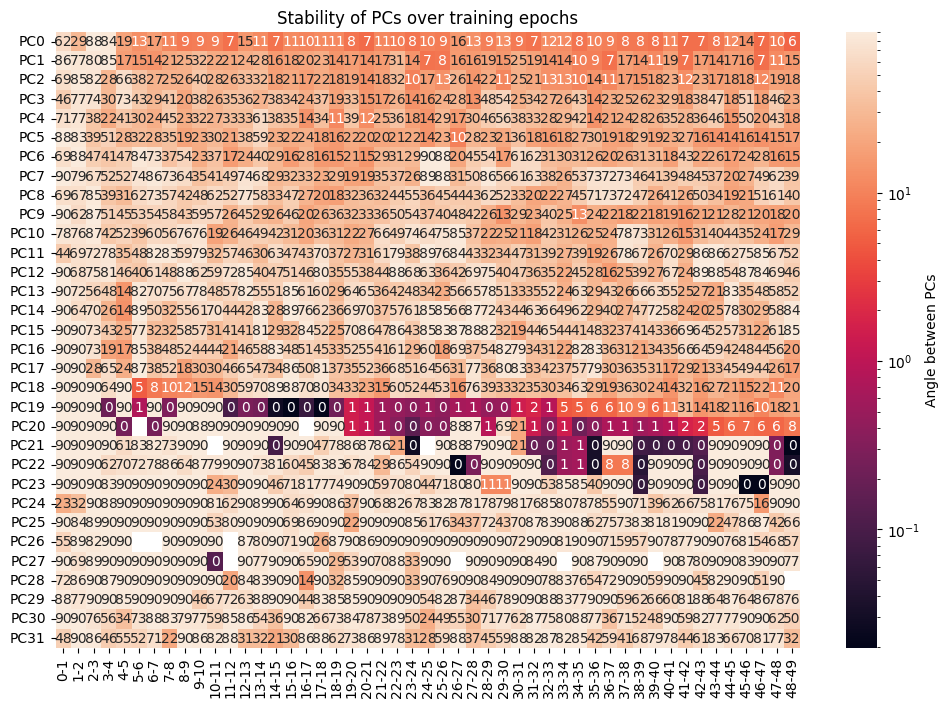

In [14]:
from matplotlib.colors import LogNorm

angle_matrix = np.zeros((len(angle_dict), len(all_epoch_pairs)))

# Fill matrix with angle data
for pc, epoch_data in angle_dict.items():
    i = 0
    for epoch_pair in all_epoch_pairs:
        angle_matrix[pc, i] = epoch_data[epoch_pair]
        i += 1

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    angle_matrix, 
    annot=True, 
    fmt=".0f",
    norm=LogNorm(), 
    xticklabels=[f"{e1}-{e2}" for e1, e2 in all_epoch_pairs], 
    yticklabels=[f"PC{pc}" for pc in angle_dict.keys()],
    cbar_kws={"label": "Angle between PCs"})
ax.set_title("Stability of PCs over training epochs")
plt.show()